### Import Section

In [7]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek #This is used for resampling the dataset

Using TensorFlow backend.


#### Settings and Configuration

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None) ---- Comment this line to avoid overflow of data in notebook

np.set_printoptions(threshold=sys.maxsize)

### Loading the dataset

In [3]:
dataPath = 'data/Preprocessed_AFData.xlsx'
data     = pd.read_excel(dataPath)

In [7]:
data.head(10)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16,data17,data18,data19,data20,data21,data22,data23,data24,data25,data26,data27,data28,data29,data30,Control
0,0.0,0.000000,0.000000,0.100000,-0.100000,0.000000,0.000000,0.400000,0.100000,0.500000,0.000000,-0.500000,-0.100000,-0.300000,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,-0.400000,-0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.296296,0.703704,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.954545,0.045455,-1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.078947,-0.078947,0.210526,-0.131579,0.921053,-0.815789,-0.184211,0.000000,0.052632,-0.052632,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.937500,-0.875000,-0.125000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.871795,-0.128205,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.909091,-0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


##### Explanation of above table:
The last column 'Control' is label. '1' value labeled row signifies that that row denotes AF is present. '0' labeled row is otherwise.

There are 30 columns.

### Visualisation

#### Drawing the ECG from the data

In [4]:
labels = data['Control']
data_x = data.drop('Control', axis='columns')

#Converting dataframes into numpy arrays
labels = np.array(labels)
data_x = np.array(data_x)

In [5]:
print(labels[0:10:1])
print(data_x[5:7:1, 0:30:1])

[1 0 0 0 0 0 1 0 0 0]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
  -1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.07894737 -0.07894737  0.21052632 -0.13157895  0.92105263
  -0.81578947 -0.18421053  0.          0.05263158 -0.05263158  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]


##### Plotting first 10 rows

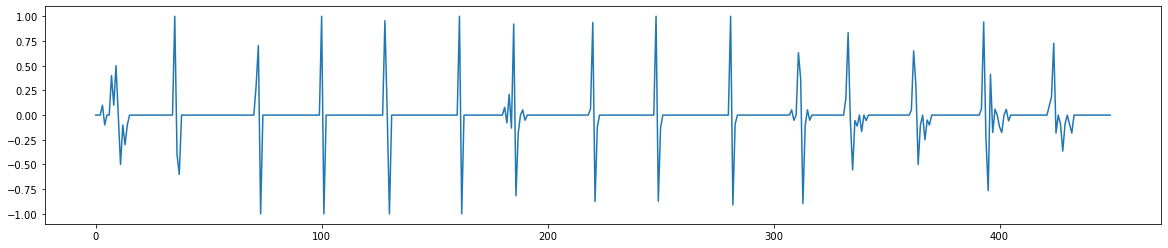

In [6]:
plt.figure(figsize=(20,4))           #figsize=(Horizontal_length, Veritcal_breadth)
plt.plot(data_x[0:15:1,:].flatten())

### Data Pre-processing Section

#### Counting the nos. of two categories
We can simply get the nos. of occurences of two categories from the 'labels' array.

Number of rows wiht label '0' is 113463
Number of rows wiht label '1' is 36537

Denoting the above same in graph:


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Classes 0 & 1')]

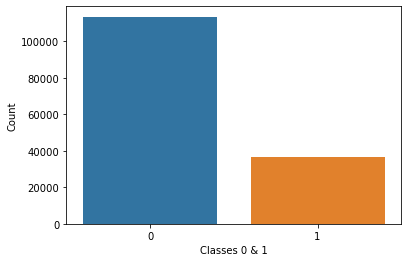

In [50]:
print("Number of rows wiht label '0' is", list(labels).count(0))
print("Number of rows wiht label '1' is", list(labels).count(1))
print("\nDenoting the above same in graph:")
bar_graph = sns.countplot(labels)
bar_graph.set(xlabel = 'Classes 0 & 1', ylabel = 'Count')

From above, we can see that data is highly imbalance. Occurences of one category is way higher than another category occurences. Highly imbalance data usually doesn't perform well on test dataset. Hence, we need to balance this data. We would employ 'resampling' technique to make data balance.

Before doing resampling, it is important to split the dataset into train and test. So that there is no resampled records in train dataset and we can actually check the effectiveness of resampling in highly imbalanced test dataset. While splitting into train and test, both these dataset would contain imbalanced data and resampling would be tested on this imbalanced test dataset.

#### Resampling and Splitting

In [ ]:
#Splitting the dataset into train and test dataset